# Exploratory Data Analysis in Action - EDA: Energy production

Energetic production questions:
- Q1: How much energy was estimated to be produced in 2020 on each continent?
- Q2: Looking at each continent: which country produces the most energy on their continent?
- Q3: Which type of ressource is most used for energy production?
- Q4: Compare the distribution of ressources used for energy production across the Top 3 Continents
- Q5: Which is the most prominent primary fuel source for each respective continent? Plot the corresponding powerplants on a map.
- Q6: _Come up with your own question_

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import sys
sys.path.append("../src/")

from helper import cuteplot
from helper import minmax_scaler
plt.rcParams["figure.figsize"] = [22,10]

In [2]:
import pickle
gdf_world = pickle.load(open( "../data/gdf_world.p", "rb" ))
gdf_europe = pickle.load(open( "../data/gdf_europe.p", "rb" ))
gdf_germany = pickle.load(open( "../data/gdf_germany.p", "rb" ))

In [3]:
gdf_world.isnull().sum()

country code                         0
country                              0
name of powerplant                   0
capacity in MW                       0
latitude                             0
longitude                            0
primary_fuel                         0
start date                           0
owner of plant                   13536
geolocation_source                 395
estimated_generation_gwh_2020     1712
green                                0
continent                            0
geometry                             0
dtype: int64

In [4]:
gdf_world.dtypes

country code                       object
country                            object
name of powerplant                 object
capacity in MW                    float64
latitude                          float64
longitude                         float64
primary_fuel                       object
start date                          int32
owner of plant                     object
geolocation_source                 object
estimated_generation_gwh_2020     float64
green                                bool
continent                          object
geometry                         geometry
dtype: object

In [5]:
values = {'estimated_generation_gwh_2020': 0}
gdf_world_clean = gdf_world.fillna(value=values).copy()
gdf_world_clean.isnull().sum()

country code                         0
country                              0
name of powerplant                   0
capacity in MW                       0
latitude                             0
longitude                            0
primary_fuel                         0
start date                           0
owner of plant                   13536
geolocation_source                 395
estimated_generation_gwh_2020        0
green                                0
continent                            0
geometry                             0
dtype: int64

In [6]:
print(len(gdf_world_clean.loc[(gdf_world_clean['country']== 'China') & (gdf_world_clean['continent']=='Europe')]))
print(len(gdf_europe.loc[(gdf_europe['country']== 'China') & (gdf_europe['continent']=='Europe')]))
anomaly_china = gdf_world_clean.loc[(gdf_world_clean['country']== 'China') & (gdf_world_clean['continent']=='Europe')]

1
0


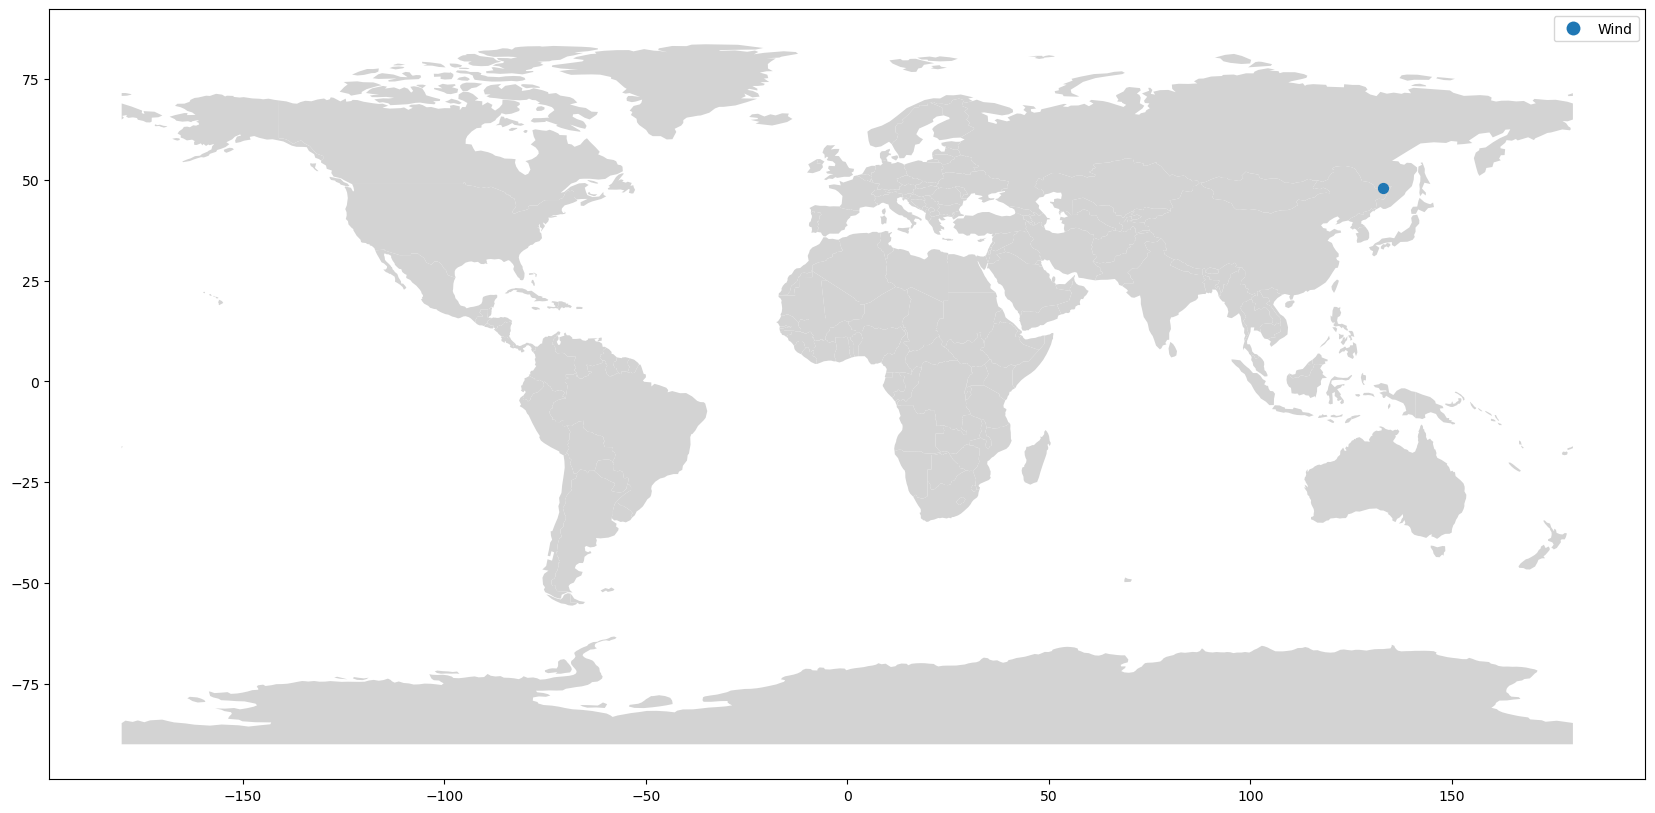

In [7]:
#world_plot.set_crs('epsg:4326', inplace=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.crs

#world.plot(facecolor='lightgray')
base = world.plot(facecolor='lightgray') # create base plot (world map)
anomaly_china.plot(
    ax=base,         # specify object to plot over
    marker='o',      # select shape of each plotted point (circle, cross, etc.)
    markersize=50,    # size of each plotted point
           # transparency of each plotted point (areas with less powerplants will become less visible)
    aspect='equal',   # set aspect ratio to 'equal'
    column='primary_fuel',
    categorical=True,
    legend=True
);

In [8]:
print(len(gdf_world_clean.loc[(gdf_world_clean['country']== 'Germany') & (gdf_world_clean['primary_fuel']=='Wind')]))
anomaly_wind = gdf_world_clean.loc[gdf_world_clean['primary_fuel']=='Wind']

12


In [9]:
#xmin, ymin, xmax, ymax = [-150, 150, -75, 75]
#gdf_subset = gdf_world_clean.cx[xmin:xmax, ymin:ymax]
#gdf_subset

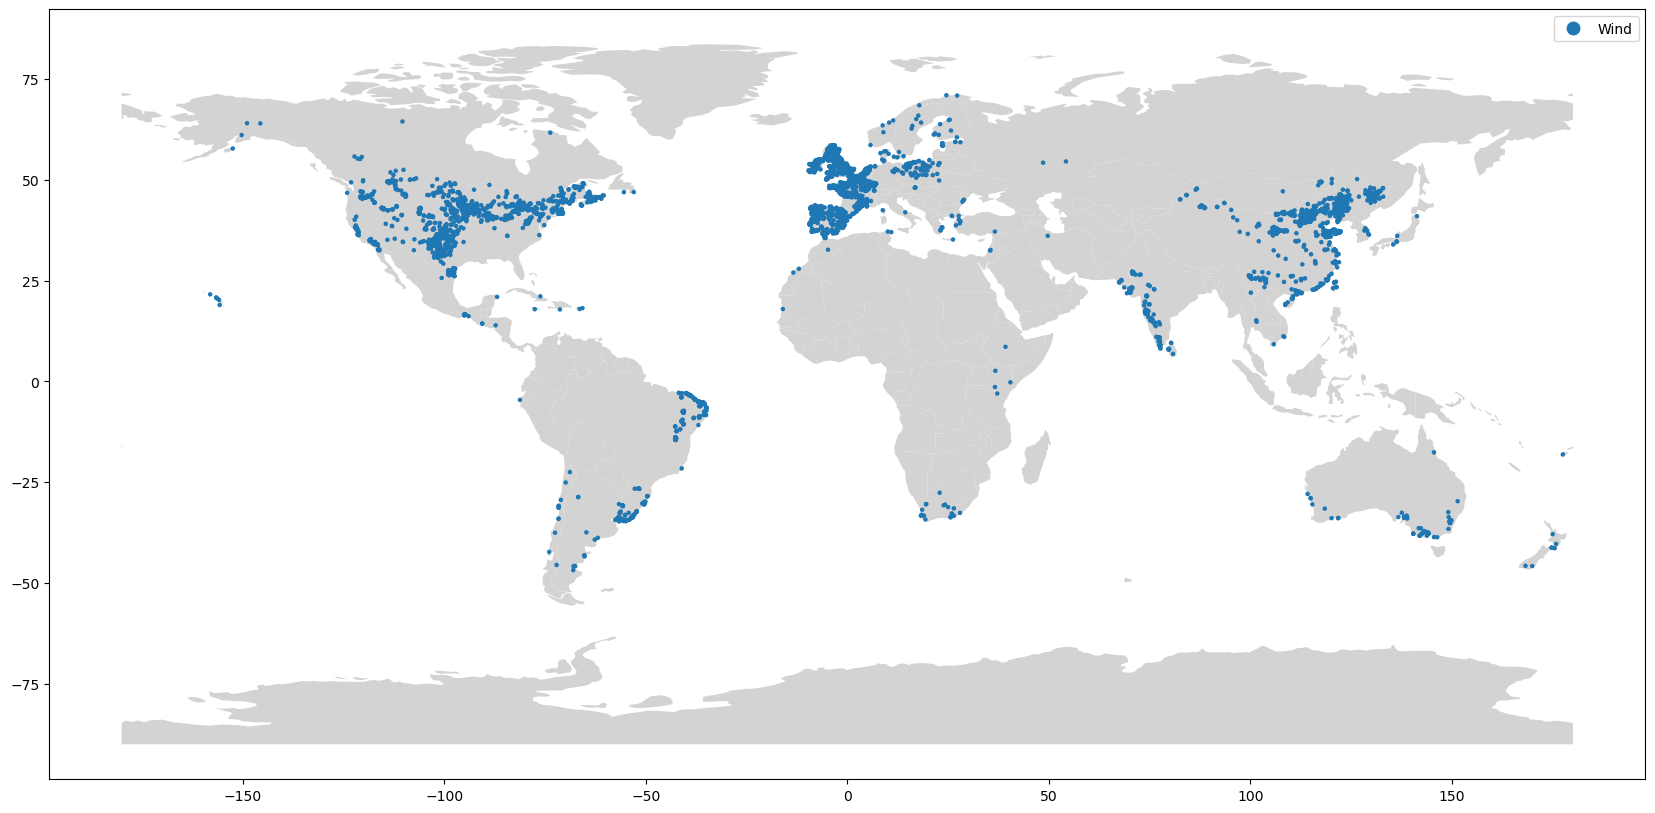

In [10]:
#world_plot.set_crs('epsg:4326', inplace=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.crs

#world.plot(facecolor='lightgray')
base = world.plot(facecolor='lightgray') # create base plot (world map)
anomaly_wind.plot(
    ax=base,         # specify object to plot over
    marker='o',      # select shape of each plotted point (circle, cross, etc.)
    markersize=5,    # size of each plotted point
           # transparency of each plotted point (areas with less powerplants will become less visible)
    aspect='equal',   # set aspect ratio to 'equal'
    column='primary_fuel',
    categorical=True,
    legend=True
);

> **Q1: How much energy was estimated to be produced in 2020 on each continent?**

In [11]:
gdf_world_clean.continent.unique()

array(['Asia', 'Europe', 'Africa', 'South America', 'Oceania',
       'North America'], dtype=object)

In [12]:
#statistische Verfahren ignorieren NaN
gdf_asia = gdf_world.loc[gdf_world['continent'] == 'Asia']
gdf_asia['estimated_generation_gwh_2020'].isnull().sum()
gdf_asia['estimated_generation_gwh_2020'].sum()

10477684.280000001

In [13]:
gdf_asia = gdf_world_clean.loc[gdf_world['continent'] == 'Asia']
gdf_asia['estimated_generation_gwh_2020'].isnull().sum()
gdf_asia['estimated_generation_gwh_2020'].sum()

10477684.280000001

In [14]:
gdf_europe = gdf_world_clean.loc[gdf_world['continent'] == 'Europe']
gdf_europe['estimated_generation_gwh_2020'].isnull().sum()
gdf_europe['estimated_generation_gwh_2020'].sum()

3804578.5499999993

In [ ]:
energy_list = []
for continent in gdf_world_clean.continent.unique():
    print(continent)
    print(gdf_world_clean.loc[gdf_world_clean['continent'] == continent]['estimated_generation_gwh_2020'].sum()/1000)#
    energy_list.append(gdf_world_clean.loc[gdf_world_clean['continent'] == continent]['estimated_generation_gwh_2020'].sum()/1000)

In [24]:
gdf_world_clean

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,start date,owner of plant,geolocation_source,estimated_generation_gwh_2020,green,continent,geometry
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,33.0,32.3220,65.1190,Hydro,-1,NaN,GEODB,119.50,True,Asia,POINT (65.11900 32.32200)
1,AFG,Afghanistan,Kandahar DOG,10.0,31.6700,65.7950,Solar,-1,NaN,Wiki-Solar,18.29,True,Asia,POINT (65.79500 31.67000)
2,AFG,Afghanistan,Kandahar JOL,10.0,31.6230,65.7920,Solar,-1,NaN,Wiki-Solar,18.72,True,Asia,POINT (65.79200 31.62300)
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,66.0,34.5560,69.4787,Hydro,-1,NaN,GEODB,174.91,True,Asia,POINT (69.47870 34.55600)
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,100.0,34.6410,69.7170,Hydro,-1,NaN,GEODB,350.80,True,Asia,POINT (69.71700 34.64100)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33654,ZMB,Zambia,Nkana,20.0,-12.8167,28.2000,Oil,-1,ZESCO,Power Africa,73.51,False,Africa,POINT (28.20000 -12.81670)
33655,ZMB,Zambia,Kariba,930.0,-16.5222,28.7619,Hydro,-1,ZESCO,GEODB,4910.70,True,Africa,POINT (28.76190 -16.52220)
33656,ZMB,Zambia,Victoria Falls,108.0,-17.9167,25.8500,Hydro,-1,ZESCO,Power Africa,578.32,True,Africa,POINT (25.85000 -17.91670)
33657,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,920.0,-18.3835,26.4700,Coal,-1,NaN,GEODB,2785.10,False,Africa,POINT (26.47000 -18.38350)


In [30]:
energy_list = []
for continent in gdf_world_clean.continent.unique():
    print(continent)
    print(gdf_world_clean.loc[gdf_world_clean['continent'] == continent]['capacity in MW'].sum()*(365*24)/(2*1000*1000))
    energy_list.append(gdf_world_clean.loc[gdf_world_clean['continent'] == continent]['capacity in MW'].sum()*(365*24)/(2*1000*1000))

Asia
10546.82189352
Europe
4367.0692703118
Africa
662.3330967600001
South America
1135.89065555304
Oceania
308.42350788
North America
6138.008965799999


In [29]:
sum(energy_list)

23158.547389824842

> **Q2: Looking at each continent: which country produces the most energy on their continent?**

In [11]:
gdf_cont = gdf_world_clean.loc[gdf_world['continent'] == 'Asia']
#energy_asia = gdf_cont.groupby(['country'])[['country','estimated_generation_gwh_2020']].sum()
#energy_asia.max()
energy_cont = pd.DataFrame(gdf_cont.groupby(['country']).agg({'country': 'first','estimated_generation_gwh_2020': 'sum'}))

energy_pd = pd.DataFrame(energy_cont)
energy_cont = energy_pd.sort_values(by='estimated_generation_gwh_2020',ascending=False)['country'][0]
energy_cont

'China'

In [12]:
print('-----------------------------------------------')
for continent in gdf_world_clean.continent.unique():
    
    gdf_cont = gdf_world_clean.loc[gdf_world_clean['continent'] == continent]
    energy_cont = pd.DataFrame(gdf_cont.groupby(['country']).agg({'country': 'first','estimated_generation_gwh_2020': 'sum'}))
    energy_cont = energy_cont.sort_values(by='estimated_generation_gwh_2020',ascending=False)
    
    print('-----------------------------------------------')
    print(continent)
    print(energy_cont['country'][0])
    print(energy_cont['estimated_generation_gwh_2020'][0]/1000)
    print('-----------------------------------------------')
print('-----------------------------------------------')

-----------------------------------------------
-----------------------------------------------
Asia
China
5794.256469999999
-----------------------------------------------
-----------------------------------------------
Europe
Russia
972.95673
-----------------------------------------------
-----------------------------------------------
Africa
South Africa
256.70278
-----------------------------------------------
-----------------------------------------------
South America
Brazil
508.20581
-----------------------------------------------
-----------------------------------------------
Oceania
Australia
265.88075
-----------------------------------------------
-----------------------------------------------
North America
United States of America
4556.15544
-----------------------------------------------
-----------------------------------------------


> **Q3: Which type of ressource is most used for energy production?**

In [13]:
#gdf_world_clean = gdf_world.fillna(0).copy()
gdf_world_clean.groupby('primary_fuel').size().sort_values(ascending=False)

primary_fuel
Solar             10461
Hydro              7095
Wind               4959
Gas                3807
Coal               2208
Oil                2121
Biomass            1394
Waste              1051
Geothermal          180
Nuclear             159
Storage             128
Other                41
Cogeneration         40
Petcoke              11
Wave and Tidal        4
dtype: int64

In [14]:
energy_report = gdf_world_clean.groupby(['primary_fuel'],as_index=False)['capacity in MW'].sum()

energy_report = energy_report.sort_values(by='capacity in MW',ascending=False)
energy_report['Output in TWh'] = energy_report['capacity in MW']*(365*24)/(1000*1000)
energy_report
#print('Die weltweite Gesamtproduktion in Twh beträgt :',energy_report.sum())

,primary_fuel,capacity in MW,Output in TWh
1,Coal,1.815332e+06,15902.306678
3,Gas,1.386671e+06,12147.237459
5,Hydro,1.050109e+06,9198.956126
6,Nuclear,3.254038e+05,2850.537726
14,Wind,2.371800e+05,2077.696480
7,Oil,2.145907e+05,1879.814424
10,Solar,1.859784e+05,1629.170888
0,Biomass,3.344945e+04,293.017161
12,Waste,1.437141e+04,125.893587
4,Geothermal,1.231215e+04,107.854434


> **Q4: Compare the distribution of ressources used for energy production across the Top-3 Continents(*)**

> _(*) Top-3 continents regarding the estimated energy production_

> Hint: Consider using bar or pie plots (you may use something different though)

In [18]:
#Gesamtenergieproduktion
energy_report_world_est = gdf_world_clean.groupby(['continent'])['estimated_generation_gwh_2020'].sum().sort_values(ascending=False)

energy_report_world = gdf_world_clean.groupby(['continent'],as_index=False)['capacity in MW'].sum()
energy_report_world = energy_report_world.sort_values(by = 'capacity in MW', ascending=False)
energy_report_world['Output in TWh'] = energy_report_world['capacity in MW']*(365*24)/(1000*1000)

#Top-3 
gdf_world_clean.groupby(['continent'])['estimated_generation_gwh_2020'].sum().sort_values(ascending=False)[:3]

#Distribution
gdf_Asia = gdf_world_clean.loc[gdf_world_clean['continent']=='Asia']
gdf_North_America = gdf_world_clean.loc[gdf_world_clean['continent']=='North America']
gdf_Europe = gdf_world_clean.loc[gdf_world_clean['continent']=='Europe']



energy_report_Asia = gdf_Asia.groupby(['primary_fuel'],as_index=False)['capacity in MW'].sum()
energy_report_Asia = energy_report_Asia.sort_values(by = 'capacity in MW',ascending=False)
energy_report_Asia['Output in TWh'] = energy_report_Asia['capacity in MW']*(365*24)/(1000*1000)
energy_report_Asia['country'] = 'Asia'

energy_report_North_America = gdf_North_America.groupby(['primary_fuel'],as_index=False)['capacity in MW'].sum()
energy_report_North_America = energy_report_North_America.sort_values(by = 'capacity in MW',ascending=False)
energy_report_North_America['Output in TWh'] = energy_report_North_America['capacity in MW']*(365*24)/(1000*1000)
energy_report_North_America['country'] = 'North_America'

energy_report_Europe = gdf_Europe.groupby(['primary_fuel'],as_index=False)['capacity in MW'].sum()
energy_report_Europe = energy_report_Europe.sort_values(by = 'capacity in MW',ascending=False)
energy_report_Europe['Output in TWh'] = energy_report_Europe['capacity in MW']*(365*24)/(1000*1000)
energy_report_Europe['country'] = 'Europe'
#energy_report_North_America = gdf_North_America.groupby(['primary_fuel'])['capacity in MW'].sum().sort_values(ascending=False)*(365*24)/(1000*1000)

#energy_report_Europe = gdf_Europe.groupby(['primary_fuel'])['capacity in MW'].sum().sort_values(ascending=False)*(365*24)/(1000*1000)


#energy_report_Asia.sum()+energy_report_North_America.sum()+energy_report_Europe.sum()

In [19]:
energy_report_Asia = energy_report_Asia[['primary_fuel','Output in TWh']]
energy_report_North_America = energy_report_North_America[['primary_fuel','Output in TWh']]
energy_report_Europe = energy_report_Europe[['primary_fuel','Output in TWh']]

<AxesSubplot: xlabel='primary_fuel'>

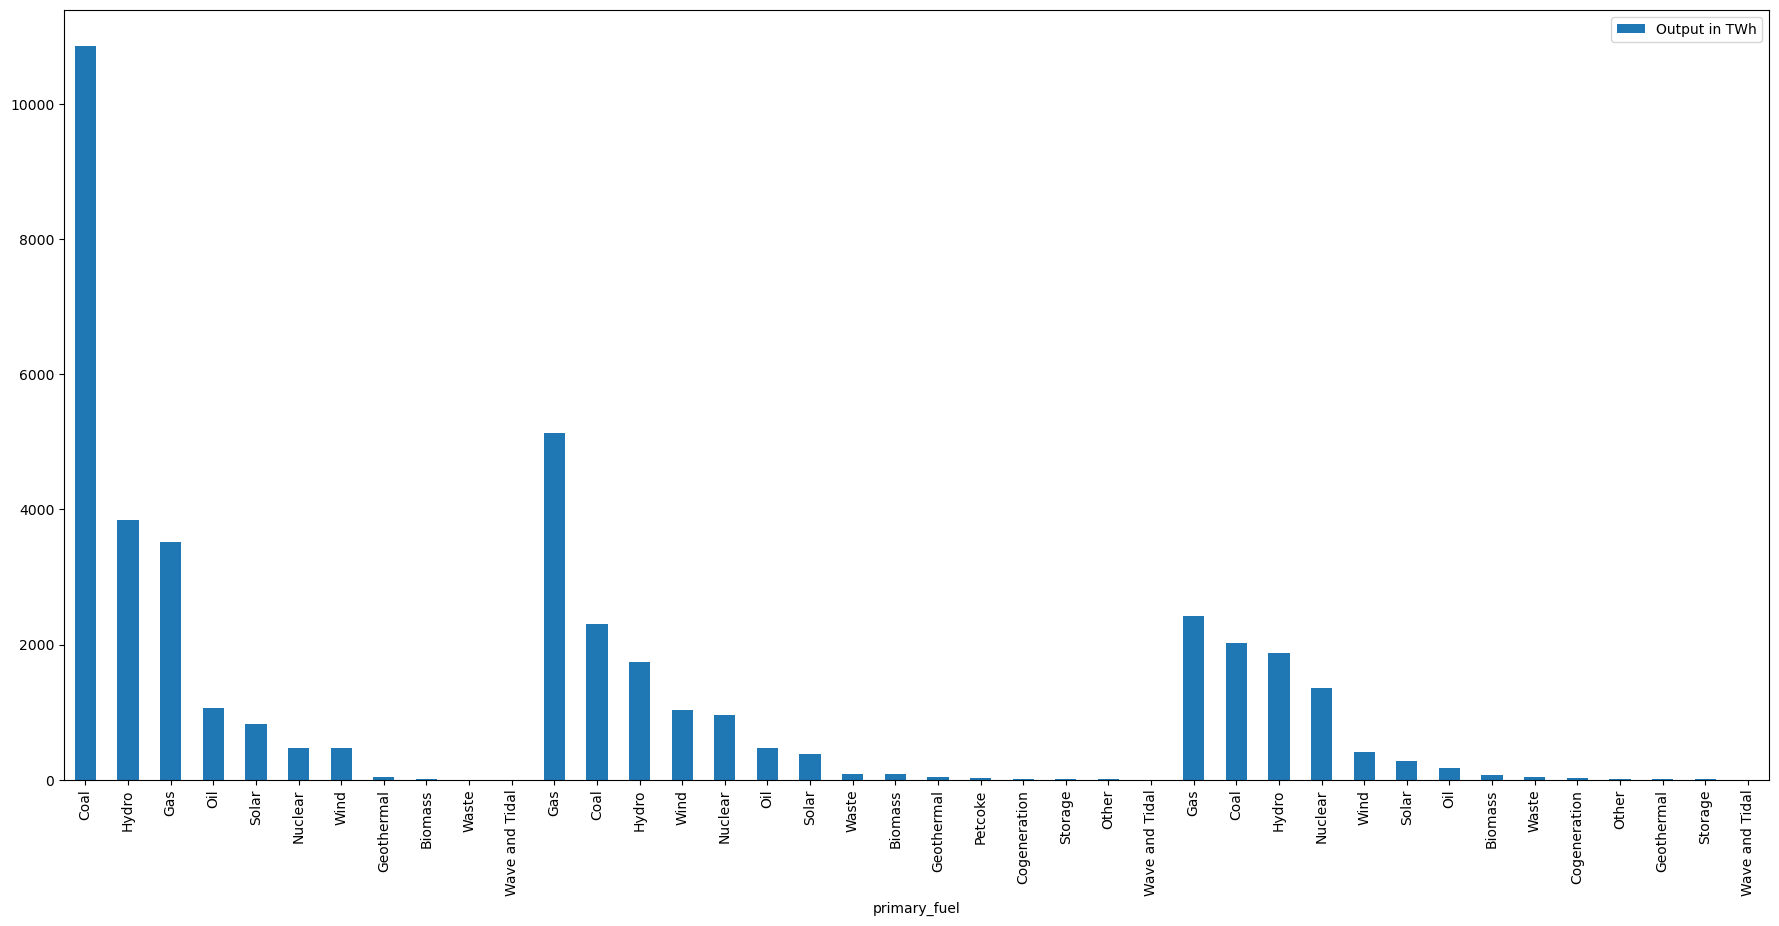

In [21]:
energy_report_top3 = pd.concat([energy_report_Asia,energy_report_North_America,energy_report_Europe])
energy_report_top3
energy_report_top3.plot.bar(x='primary_fuel')

In [67]:
energy_report_world_est.sum()*(1)/(1000)

21716.8569

In [69]:
#(energy_report_world*(365*24)/(1000*1000)).sum()

<AxesSubplot: xlabel='continent'>

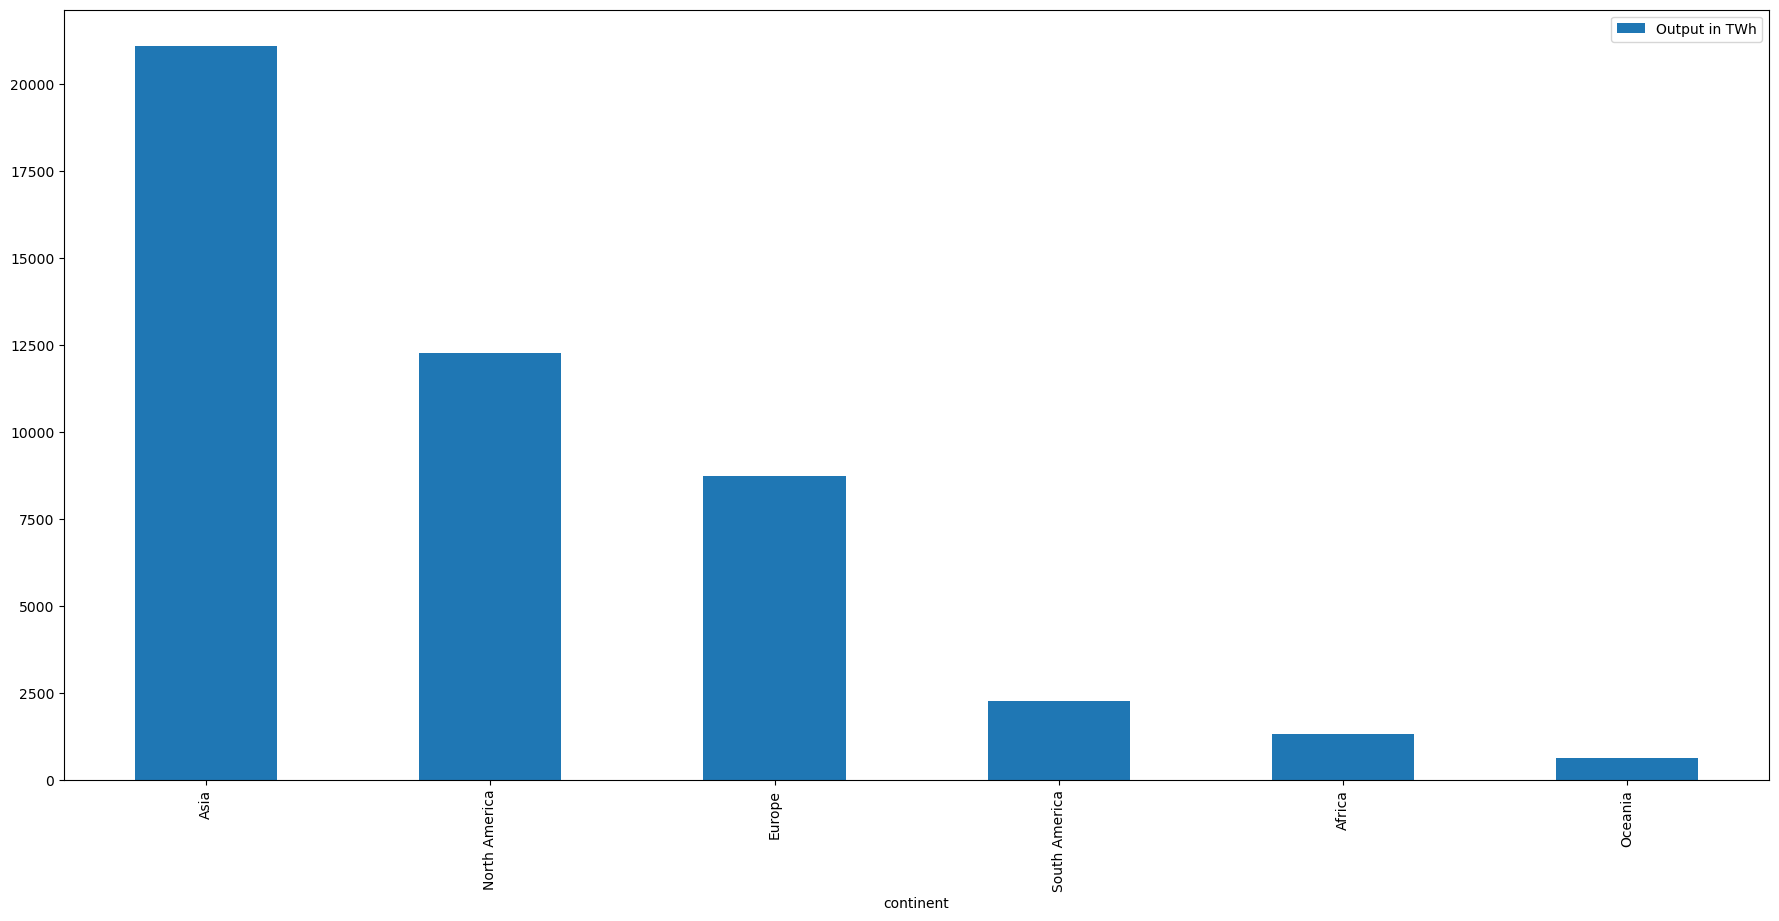

In [70]:
energy_report_world_plot = pd.concat([energy_report_world['continent'],energy_report_world['Output in TWh']], axis = 1)
energy_report_world_plot.plot.bar(x='continent')

> **Q5: Which is the most prominent primary fuel source for each respective continent? Plot the corresponding powerplants on a map.** 

In [90]:

continents = gdf_world_clean['continent'].unique()
for continent in continents:
    _ = gdf_world_clean.loc[gdf_world_clean['continent']== continent]
    primary=_.groupby(['primary_fuel'],as_index=False)['capacity in MW'].sum().sort_values(by = 'capacity in MW', ascending = False)
    primary.reset_index(inplace=True)
    print('--------------------------')
    print(continent)
    print(primary.stack()[0]['primary_fuel'])

--------------------------
Asia
Coal
--------------------------
Europe
Gas
--------------------------
Africa
Gas
--------------------------
South America
Hydro
--------------------------
Oceania
Coal
--------------------------
North America
Gas


In [22]:
gdf_plot_asia = gdf_world_clean.loc[(gdf_world_clean['continent']== 'Asia') & (gdf_world_clean['primary_fuel'] == 'Coal')]
gdf_plot_europe = gdf_world_clean.loc[(gdf_world_clean['continent']== 'Europe') & (gdf_world_clean['primary_fuel'] == 'Gas')]
gdf_plot_africa = gdf_world_clean.loc[(gdf_world_clean['continent']== 'Africa') & (gdf_world_clean['primary_fuel'] == 'Gas')]
gdf_plot_southamerica = gdf_world_clean.loc[(gdf_world_clean['continent']== 'South America') & (gdf_world_clean['primary_fuel'] == 'Hydro')]
gdf_plot_oceania = gdf_world_clean.loc[(gdf_world_clean['continent']== 'Oceania') & (gdf_world_clean['primary_fuel'] == 'Coal')]
gdf_plot_northamerica = gdf_world_clean.loc[(gdf_world_clean['continent']== 'North America') & (gdf_world_clean['primary_fuel'] == 'Gas')]

world_plot = pd.concat([gdf_plot_asia,gdf_plot_europe,gdf_plot_africa,gdf_plot_southamerica,gdf_plot_oceania,gdf_plot_northamerica],axis = 0)

In [23]:
world_plot

,country code,country,name of powerplant,capacity in MW,latitude,longitude,primary_fuel,start date,owner of plant,geolocation_source,estimated_generation_gwh_2020,green,continent,geometry
4910,BGD,Bangladesh,Barupukuria ST 1,250.0,25.5502,88.9527,Coal,-1,NaN,WRI,902.32,False,Asia,POINT (88.95270 25.55020)
4964,IND,India,ADITYA CEMENT WORKS,98.0,24.7663,74.6090,Coal,-1,Ultratech Cement ltd,WRI,516.25,False,Asia,POINT (74.60900 24.76630)
4967,IND,India,AKALTARA TPP,1800.0,21.9603,82.4091,Coal,2015,NaN,WRI,9482.32,False,Asia,POINT (82.40910 21.96030)
4968,IND,India,AKRIMOTA LIG,250.0,23.7689,68.6447,Coal,2005,NaN,WRI,1316.98,False,Asia,POINT (68.64470 23.76890)
4972,IND,India,AMAR KANTAK,210.0,23.1642,81.6373,Coal,2008,NaN,WRI,1106.27,False,Asia,POINT (81.63730 23.16420)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33577,USA,United States of America,EcoEléctrica,507.0,17.9812,-66.7552,Gas,-1,Gas Natural Fenosa International Power,WRI,1787.93,False,North America,POINT (-66.75520 17.98120)
33582,USA,United States of America,Mayagüez,220.0,18.2194,-67.1600,Gas,-1,NaN,WRI,775.82,False,North America,POINT (-67.16000 18.21940)
33584,USA,United States of America,Palo Seco,126.0,18.4551,-66.1498,Gas,-1,NaN,WRI,444.33,False,North America,POINT (-66.14980 18.45510)
33593,USA,United States of America,Vega Baja,42.0,18.4458,-66.3914,Gas,-1,NaN,WRI,148.11,False,North America,POINT (-66.39140 18.44580)


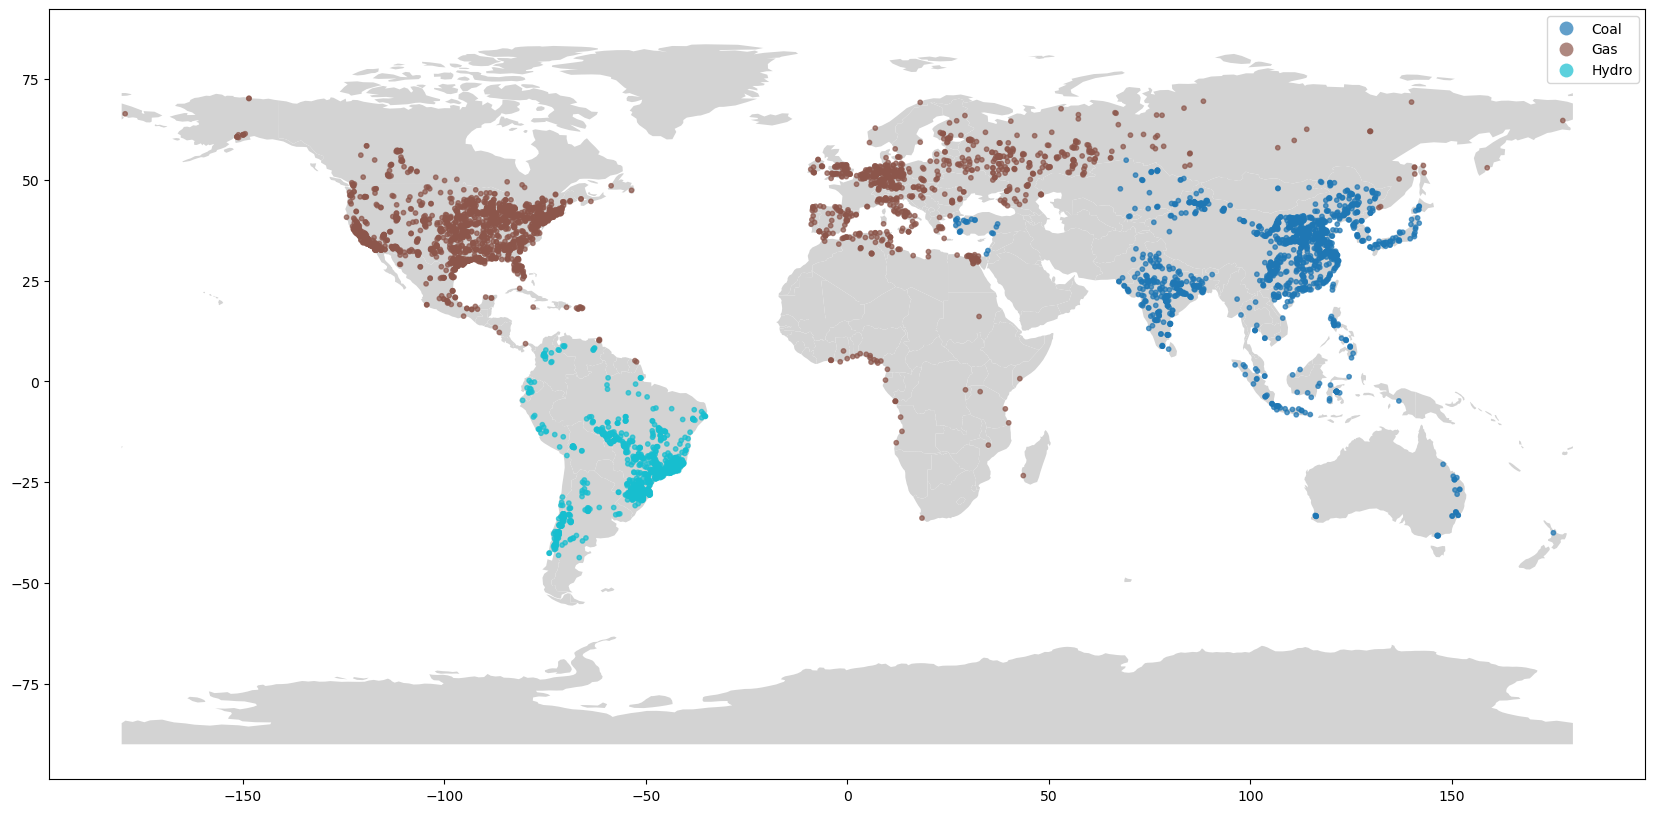

In [24]:
world_plot.set_crs('epsg:4326', inplace=True)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

world.crs

#world.plot(facecolor='lightgray')
base = world.plot(facecolor='lightgray') # create base plot (world map)
world_plot.plot(
    ax=base,         # specify object to plot over
    marker='o',      # select shape of each plotted point (circle, cross, etc.)
    markersize=10,    # size of each plotted point
    alpha=0.7,       # transparency of each plotted point (areas with less powerplants will become less visible)
    aspect='equal',   # set aspect ratio to 'equal'
    column='primary_fuel',
    categorical=True,
    legend=True
);


> **Q6: _Come up with your own question_**

In [ ]:
top3 = {'Asia' : 'energy_report_Asia', 'North America' : 'energy_report_North_America', 'Europe' : 'energy_report_Europe'}
countries = ['Asia','North America','Europe']

for country in countries:
    #top3[country] = country.groupby(['primary_fuel'],as_index=False)['capacity in MW'].sum()
    #top3[country] = top3[country].sort_values(by = 'capacity in MW',ascending=False)
    top3[country]['Output in TWh'] = top3[country]['capacity in MW']*(365*24)/(1000*1000)